## Learning Outcomes
- Exploratory data analysis & preparing the data for model building. 
- Machine Learning - Supervised Learning Classification
  - Logistic Regression
  - Naive bayes Classifier
  - KNN Classifier
  - Decision Tree Classifier
  - Random Forest Classifier
  - Ensemble methods
- Training and making predictions using different classification models.
- Model evaluation

## Objective: 
- The Classification goal is to predict “heart disease” in a person with regards to different factors given. 

## Context:
- Heart disease is one of the leading causes of death for people of most races in the US. At least 1 of 3 key risk factors for heart disease: high blood pressure, high cholesterol, and smoking. 
- Detecting and preventing the factors that have the greatest impact on heart disease is very important in healthcare. Machine learning methods may detect "patterns" from the data and can predict whether a patient is suffering from any heart disease or not..

## Dataset Information

#### Source: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease?datasetId=1936563&sortBy=voteCount
Originally, the dataset come from the CDC and is a major part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to gather data on the health status of U.S. residents. 

This dataset consists of eighteen columns
- HeartDisease: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)
- BMI: Body Mass Index (BMI)
- Smoking: smoked at least 100 cigarettes in your entire life
- AlcoholDrinking: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
- Stroke:Ever had a stroke?
- PhysicalHealth: physical health, which includes physical illness and injury
- MentalHealth: for how many days during the past 30 days was your mental health not good?
- DiffWalking: Do you have serious difficulty walking or climbing stairs?
- Sex: male or female?
- AgeCategory: Fourteen-level age category
- Race: Imputed race/ethnicity value
- Diabetic: diabetes?
- PhysicalActivity: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
- GenHealth: Would you say that in general your health is good, fine or excellent?
- SleepTime: On average, how many hours of sleep do you get in a 24-hour period?
- Asthma: you had asthma?
- KidneyDisease: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
- SkinCancer: Ever had skin cancer?

### 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns
sns.set(style = "ticks")
import warnings
warnings.filterwarnings('ignore')

In [4]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,StackingClassifier,GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder

### 2. Load the dataset and display a sample of five rows of the data frame.

In [10]:
## reading dataset
data = pd.read_csv('heart_2020_cleaned.csv')

In [7]:
import os

In [8]:
os.getcwd()

'/Users/krishnakumar'

In [9]:
os.chdir('/Users/krishnakumar/Documents/git/krishnaKumar_Lab3_Python-for-DS')

In [12]:
## setting max columns to none
pd.set_option('display.max_columns', None)
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


### 3. Check the shape of the data (number of rows and columns). Check the general information about the dataframe using the .info() method.

In [13]:
## getting the shape of the dataset 

data.shape

(319795, 18)

In [14]:
## getting general information of the dataset using info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

### 4. Check the statistical summary of the dataset and write your inferences.

In [15]:
## getting the summary of the numerical columns in dataset

data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [26]:
## getting the summary of the categorical columns in dataset

data.describe(include='object')

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,292422,187887,298018,307726,275385,167805,34151,245212,269653,247957,113858,276923,308016,289976


### Inferences:
- From the summary, it is evident that there are 319795 records in total
- With respect to the numerical data, the columns 'PhysicalHeath', 'MentalHealth' have a minimum value of 0 (with most occurances) and 'SleepTime' has a miminum value 1; Column 'BMI' has minimum value of 12.02
- We are also able to observe the mean, standard deviation, min-max values of numerical data from the summary
- With respect to the categorical data, it is observed that most people from the dataset are healthy and are physically active
- Further, female population is more than the males in the given dataset

### 5. Check the percentage of missing values in each column of the data frame. Drop the missing values if there are any.

In [27]:
## getting percentage of missing values

(data.isnull().sum()/len(data))*100

HeartDisease        0.0
BMI                 0.0
Smoking             0.0
AlcoholDrinking     0.0
Stroke              0.0
PhysicalHealth      0.0
MentalHealth        0.0
DiffWalking         0.0
Sex                 0.0
AgeCategory         0.0
Race                0.0
Diabetic            0.0
PhysicalActivity    0.0
GenHealth           0.0
SleepTime           0.0
Asthma              0.0
KidneyDisease       0.0
SkinCancer          0.0
dtype: float64

### 6. Check if there are any duplicate rows. If any drop them and check the shape of the dataframe after dropping duplicates.

In [28]:
## getting duplicate records in the dataset

data[data.duplicated()]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
2182,No,19.85,No,No,No,0.0,0.0,No,Female,80 or older,White,No,Yes,Excellent,7.0,No,No,No
3182,No,28.19,No,No,No,0.0,0.0,No,Female,50-54,White,No,Yes,Excellent,7.0,No,No,No
3397,No,26.54,No,No,No,0.0,0.0,No,Male,45-49,White,No,Yes,Excellent,6.0,No,No,No
3650,No,32.89,Yes,No,No,2.0,1.0,No,Female,50-54,White,No,Yes,Good,9.0,No,No,No
4061,No,25.84,No,No,No,0.0,0.0,No,Female,40-44,White,No,Yes,Excellent,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319671,No,25.06,No,No,No,0.0,0.0,No,Male,40-44,Hispanic,No,Yes,Excellent,7.0,No,No,No
319689,No,27.44,No,No,No,0.0,0.0,No,Female,30-34,Hispanic,No,Yes,Very good,6.0,No,No,No
319726,No,30.41,No,No,No,0.0,0.0,No,Male,18-24,Hispanic,No,Yes,Excellent,7.0,No,No,No
319751,No,34.96,No,No,No,0.0,0.0,No,Male,18-24,Hispanic,No,Yes,Excellent,6.0,No,No,No


In [29]:
## checking the shape of duplicate records in dataset

data[data.duplicated()].shape

(18078, 18)

In [30]:
## dropping duplicates and checking its shape

data_drop = data.drop_duplicates()
data_drop.shape

(301717, 18)

### 7. Check the distribution of the target variable (i.e. 'HeartDisease') and write your observations.

<Axes: ylabel='HeartDisease'>

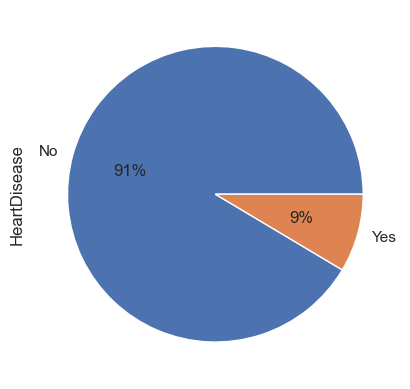

In [31]:
## plotting the percentage values in pie-chart

data['HeartDisease'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%')

### Observations:
- From the plot, it is clear that the percentage of people suffereing from heart-disease are lesser than others
- About 9% of people are suffering from heart-disease which is about (1/10)th of the total population

### 8. Visualize the distribution of the target column 'Heart disease' with respect to various categorical features and write your observations.

In [32]:
## getting all categorical features from the dataset

data_categorical = data.select_dtypes(['object']).columns
data_categorical

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

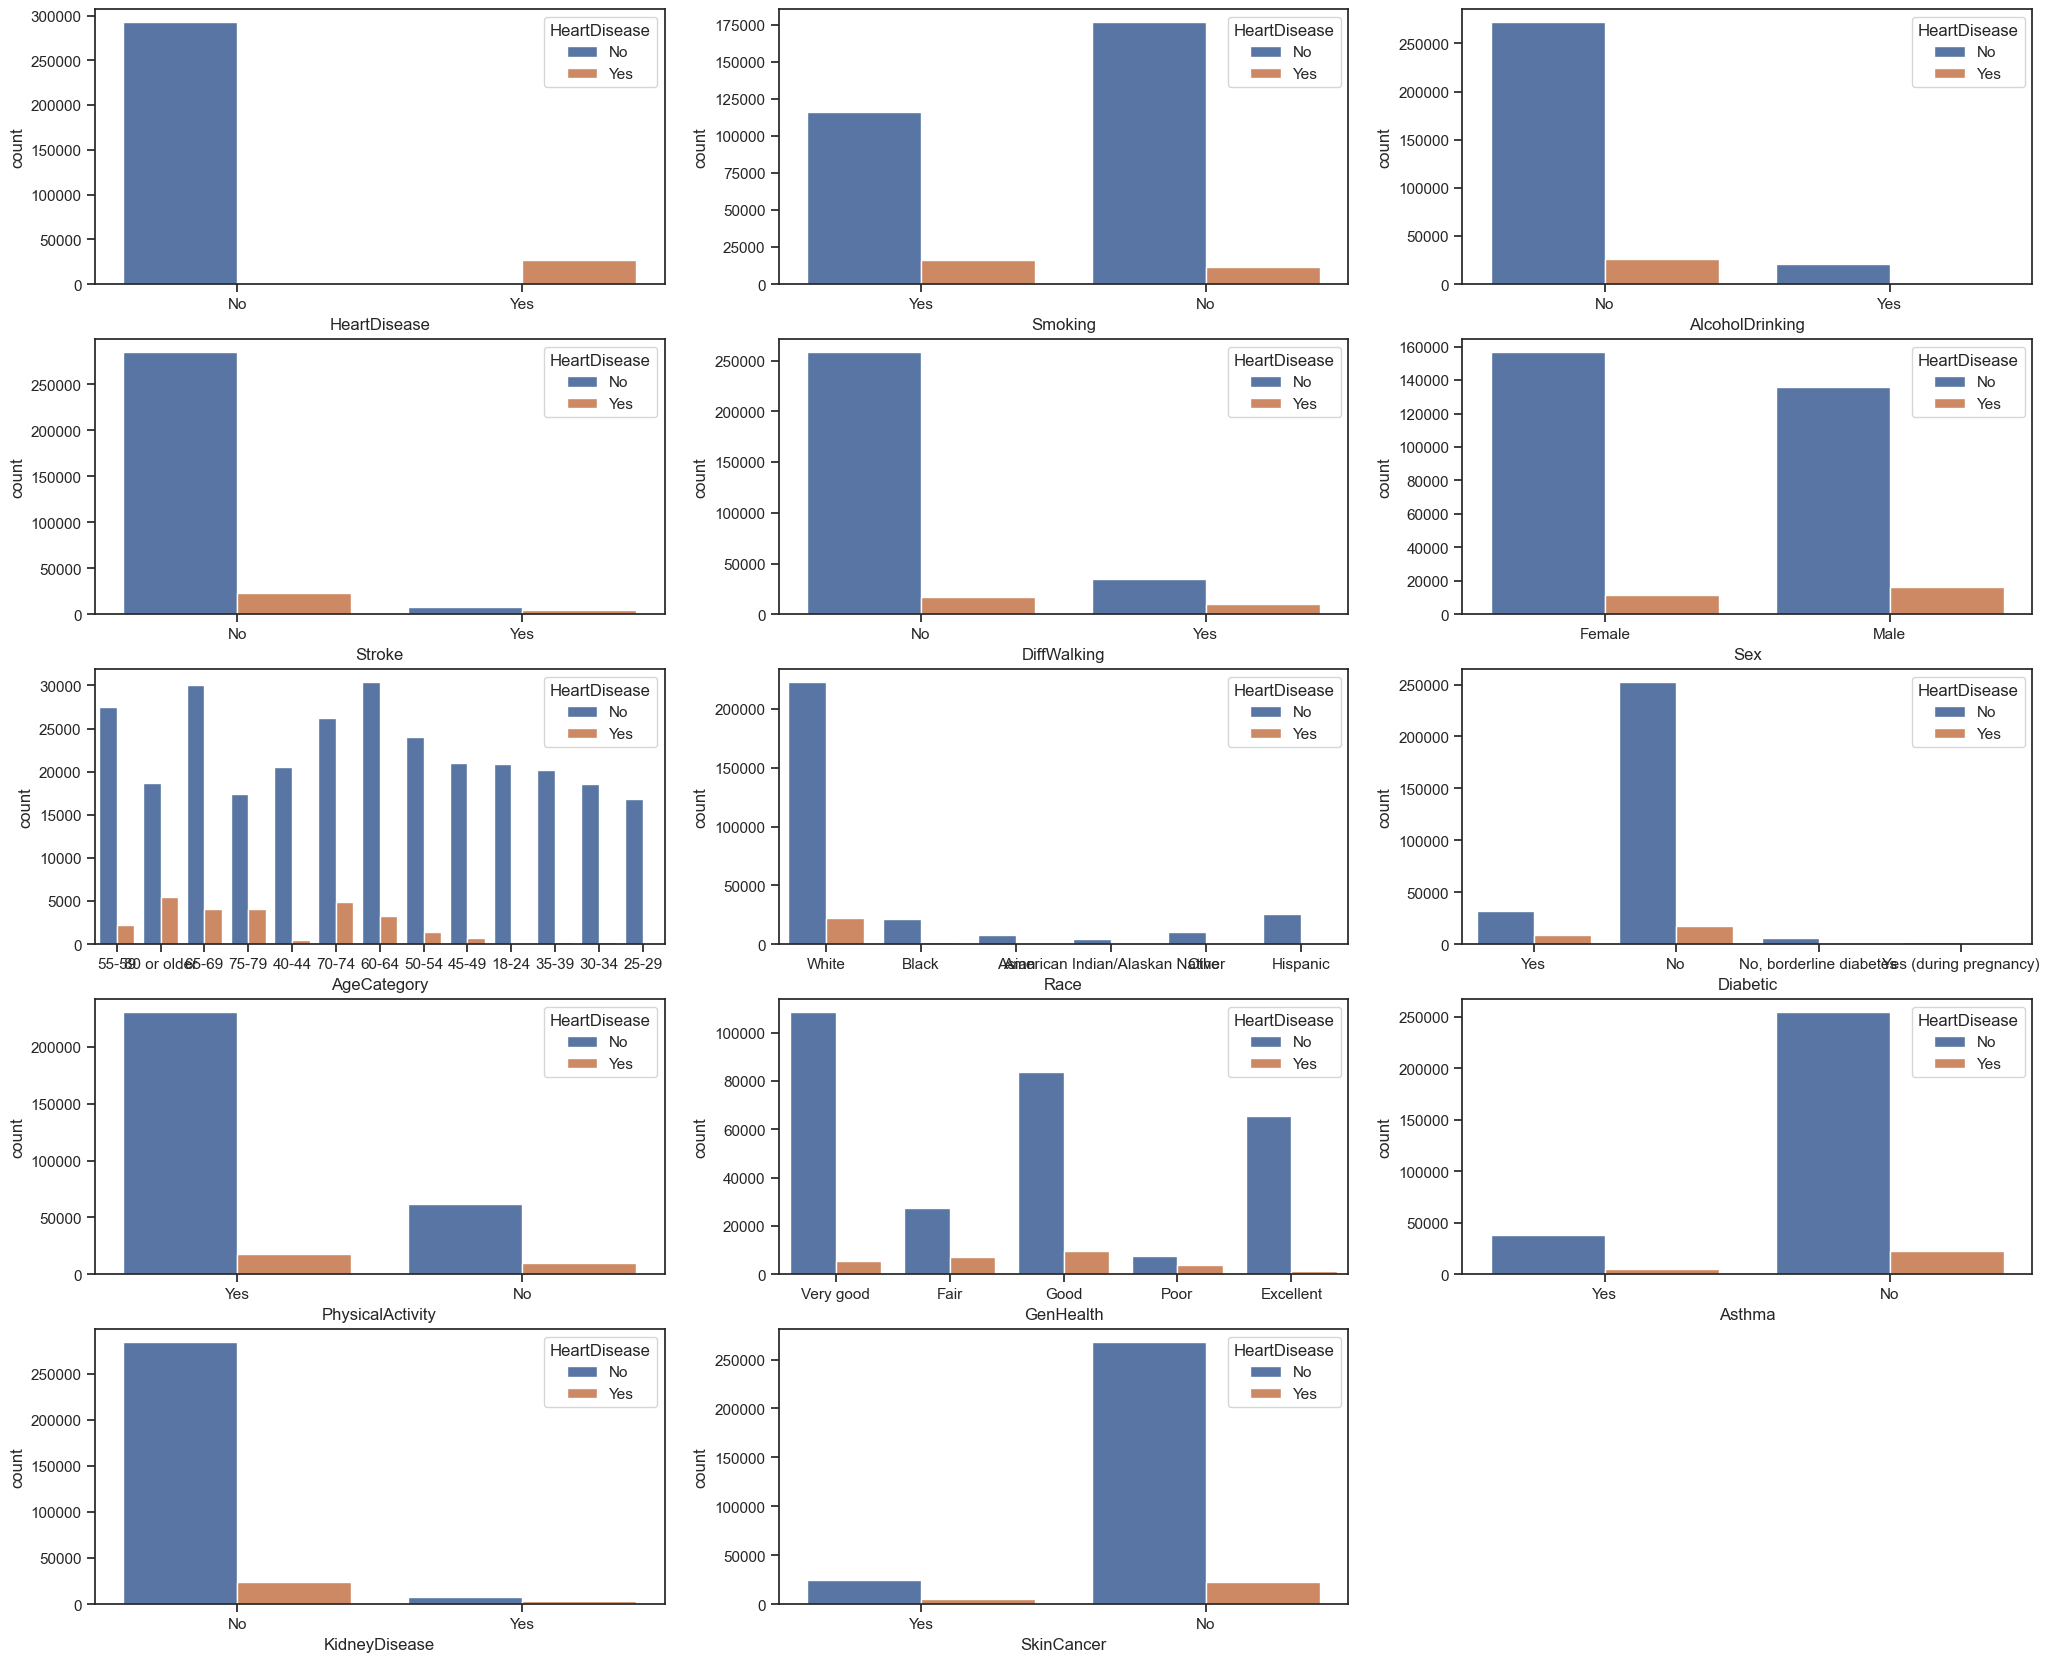

In [33]:
## plot of relation with various categorical features with column 'Heart Disease'

plt.figure(1, figsize = (25,25))
i = 1
for column in data_categorical:
    plt.subplot(6,3,i)
    sns.countplot(data = data, x = column, hue = 'HeartDisease')
    i += 1

### Observations:
- From the above subplots, it is observed that people suffering from heart disease are lesser in comparison to the given dataset
- People with smoking habits are more susceptible to heart disease than the non-smokers
- Alcohol drinkers are not suffering from heart-disease in comparison to the Tee-totalers
- Affected males are higher in number than the affected females
- The highest affected people fall between the age category of 80-or-old and 70-74
- White people are highly suffering from heart disease and others races have negligible or no affected people
- No. of Physically active people suffering from heart disease is more than those from inactive people
- People with their general health rated as 'Good' have more number of heart disease patients and very less number is found among people rated 'Excellent'
- Among the people who have experienced stroke, the heart disease is most likely to be prevalent. But, the overall analysis shows that people with no stroke are affected more in number
- Similar to the previous case, people who have difficulty in walking/climbing stairs are more likely to have heart disease; but as per the overall analysis, the count of people suffering from heart disease is more among people who don't have difficulty in walking
- Same can be observed in cases of Asthma or Diabetes or Kidney disease or Skin cancer affected population

### 9. Check the unique categories in the column 'Diabetic'. Replace 'Yes (during pregnancy)' as 'Yes' and 'No, borderline diabetes' as 'No'.

In [34]:
## Getting unique values in the column 'Diabetic'

data['Diabetic'].unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [35]:
## Replacing 'Yes (during pregnancy)' as 'Yes' and 'No, borderline diabetes' as 'No'

data['Diabetic'] = data['Diabetic'].replace({'Yes (during pregnancy)':'Yes','No, borderline diabetes':'No'})

#data['Diabetic'] = data_df['Diabetic'].replace(to_replace='Yes (during pregnancy)', value='Yes')
#data['Diabetic'] = data_df['Diabetic'].replace(to_replace='No, borderline diabetes', value='No')

data['Diabetic'].unique()

array(['Yes', 'No'], dtype=object)

### 10. For the target column 'HeartDiease', Replace 'No' as 0 and 'Yes' as 1. 

In [36]:
## Replacing 'Yes' as 1 and 'No' as 0 for column "HeartDisease"

data['HeartDisease'] = data['HeartDisease'].replace({'Yes':1,'No':0})

#data['HeartDisease'].replace(to_replace="Yes", value=1)
#data['HeartDisease'].replace(to_replace="No", value=0)

data['HeartDisease'].unique()

array([0, 1])

### 11. Label Encode the columns "AgeCategory", "Race", and "GenHealth". Encode the rest of the columns using dummy encoding approach.

In [37]:
## selecting columns - 'AgeCategory', 'Race', and 'GenHealth'

selected_object_columns = [i for i in data[['AgeCategory','Race','GenHealth']] if data.dtypes[i] == object]
selected_object_columns

['AgeCategory', 'Race', 'GenHealth']

In [38]:
## performing label encoding for selected columns

le = LabelEncoder()

for i in selected_object_columns:
    data[i] = le.fit_transform(data[i].astype(str))
    data[i] = data[i].astype(int)
    
    
data[['AgeCategory','Race','GenHealth']]

,AgeCategory,Race,GenHealth
0,7,5,4
1,12,5,4
2,9,5,1
3,11,5,2
4,4,5,4
...,...,...,...
319790,8,3,1
319791,3,3,4
319792,5,3,2
319793,1,3,2


In [39]:
## selecting remaining object type columns

other_object_columns = [i for i in data if data.dtypes[i] == object]
other_object_columns

['Smoking',
 'AlcoholDrinking',
 'Stroke',
 'DiffWalking',
 'Sex',
 'Diabetic',
 'PhysicalActivity',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

In [40]:
##  performing dummy encoding for remaining object type columns

data[other_object_columns] = pd.get_dummies(data[other_object_columns], drop_first=True)
data[other_object_columns]

,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,Diabetic,PhysicalActivity,Asthma,KidneyDisease,SkinCancer
0,1,0,0,0,0,1,1,1,0,1
1,0,0,1,0,0,0,1,0,0,0
2,1,0,0,0,1,1,1,1,0,0
3,0,0,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
319790,1,0,0,1,1,1,0,1,0,0
319791,1,0,0,0,1,0,1,1,0,0
319792,0,0,0,0,0,0,1,0,0,0
319793,0,0,0,0,0,0,0,0,0,0


### 12. Store the target column (i.e.'HeartDisease') in the y variable and the rest of the columns in the X variable.

In [41]:
## storing traget column 'HeartDisease' in variable Y and others in variable X

X = data.drop('HeartDisease', axis = 1)
Y = data['HeartDisease']

In [42]:
X.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,1,0,0,3.0,30.0,0,0,7,5,1,1,4,5.0,1,0,1
1,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,26.58,1,0,0,20.0,30.0,0,1,9,5,1,1,1,8.0,1,0,0
3,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0


In [43]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: HeartDisease, dtype: int64

### 13. Split the dataset into two parts (i.e. 70% train and 30% test) and print the shape of the train and test data

In [44]:
## splitting the data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(223856, 17) (95939, 17)
(223856,) (95939,)


### 14. Standardize the numerical columns using Standard Scalar approach for both train and test data.

In [45]:
## scaling the numerical data using StandardScaler (only numerical column data, except dummy encoded data)

ss = StandardScaler()

X_train.iloc[:,[0,4,5,8,9,12,13]] = ss.fit_transform(X_train.iloc[:,[0,4,5,8,9,12,13]])
X_test.iloc[:,[0,4,5,8,9,12,13]] = ss.transform(X_test.iloc[:,[0,4,5,8,9,12,13]])

### 15. Write a function.
- i) Which can take the model and data as inputs.
- ii) Fits the model with the train data.
- iii) Makes predictions on the test set.
- iv) Returns the Accuracy Score.

In [46]:
## defining a function for returning the accuracy score for a model and its data-inputs

def fit_predict_print(model, X_train, X_test, Y_train, Y_test):
    model.fit(X_train, Y_train)                                   # fit the model using training data
    prediction = model.predict(X_test)                            # make predictions for the model using test data
    accuracy = accuracy_score(Y_test, prediction)                 # compute accuracy
    return accuracy                                               # retrun accuracy metric


### 16. Use the function and train a Logistic regression, KNN, Naive Bayes, Decision tree, Random Forest, Adaboost, GradientBoost, and Stacked Classifier models and make predictions on test data and evaluate the models, compare and write your conclusions and steps to be taken in future in order to improve the accuracy of the model.

In [47]:
## declaring different training methods

lr = LogisticRegression()
nb = GaussianNB()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
adb = AdaBoostClassifier()
gb = GradientBoostingClassifier()

estimators = [('rf',rf), ('knn',knn), ('gb',gb), ('adb',adb)]            # taking the first layer of algorithms
sc = StackingClassifier(estimators = estimators, final_estimator = rf)

In [48]:
## training the model with different methods and evaluating their accuracy

result = pd.DataFrame(columns = ['Accuracy'])

for model, model_name in zip([lr, nb, knn, dt, rf, adb, gb, sc], 
                            ['Logistic Regression', 'Naive Bayes', 'KNN', 'Decision Tree', 'Random Forest', 
                             'Ada Boost', 'Gradient Boost', 'Stacking']):
    result.loc[model_name] = fit_predict_print(model, X_train, X_test, Y_train, Y_test)
    
    
    
## displaying the result

result

,Accuracy
Logistic Regression,0.915238
Naive Bayes,0.844881
KNN,0.907441
Decision Tree,0.863799
Random Forest,0.906857
Ada Boost,0.916009
Gradient Boost,0.916895
Stacking,0.911308


### Conclusion

- From EDA:
    - Smokers have a higher susceptibility to heart disease than the non-smokers
    - Tee-totalers suffering from heart diseases are higher than the alcohol consumers
    - Males have high probablitiy of suffering from heart diseases than the female population
    - The larger group of people affected by heart disease fall between 50-80 or older (highest observed in 80-or-older group)
    - People with more physical activity and those who have difficulty in walking/climbing stairs are more susceptible to heart diseases
- From Model evaluation:
    - From the result, it is evident that the best peforming models are Gradient Boost, Ada Boost, Logistic Regression, Stacked Classifier, KNN with around 91% accuracy
    - Given that the target is highly imbalanced, accuracy does not hold good for imbalanced data. Accuracy becomes a poor measure of evaluation for our classification model
    - We can also evaluate our model with different performance metrics like precision, recall and F1 score and choose the model accordingly
    - Further we can apply sampling techniques and try to balance the data and build models on that data. This will increase the performance of our model
    - We can also opt to fine-tune the hyperparameters and find the best set of hyperparameters and building models based on them can lead to better accuracy of our model
    - Moreover, we can also try training our model using cross-validations or use ensembling methods to improve the model accuracy thereby leading to improved performance

----
## Happy Learning:)
----